In [1]:
"""
The Simplified Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

# Import PuLP modeler functions
from pulp import *

# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem", LpMinimize)

# The 2 variables Beef and Chicken are created with a lower limit of zero
x1 = LpVariable("ChickenPercent", 0, None, LpInteger)
x2 = LpVariable("BeefPercent", 0)

# The objective function is added to 'prob' first
prob += 0.013 * x1 + 0.008 * x2, "Total Cost of Ingredients per can"

# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100 * x1 + 0.200 * x2 >= 8.0, "ProteinRequirement"
prob += 0.080 * x1 + 0.100 * x2 >= 6.0, "FatRequirement"
prob += 0.001 * x1 + 0.005 * x2 <= 2.0, "FibreRequirement"
prob += 0.002 * x1 + 0.005 * x2 <= 0.4, "SaltRequirement"

# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))


Status: Optimal
BeefPercent = 66.0
ChickenPercent = 34.0
Total Cost of Ingredients per can =  0.97


c:\Users\raiya\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [3]:
"""
The Full Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

# Import PuLP modeler functions
from pulp import *

# Creates a list of the Ingredients
Ingredients = ["CHICKEN", "BEEF", "MUTTON", "RICE", "WHEAT", "GEL"]

# A dictionary of the costs of each of the Ingredients is created
costs = {
    "CHICKEN": 0.013,
    "BEEF": 0.008,
    "MUTTON": 0.010,
    "RICE": 0.002,
    "WHEAT": 0.005,
    "GEL": 0.001,
}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {
    "CHICKEN": 0.100,
    "BEEF": 0.200,
    "MUTTON": 0.150,
    "RICE": 0.000,
    "WHEAT": 0.040,
    "GEL": 0.000,
}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {
    "CHICKEN": 0.080,
    "BEEF": 0.100,
    "MUTTON": 0.110,
    "RICE": 0.010,
    "WHEAT": 0.010,
    "GEL": 0.000,
}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {
    "CHICKEN": 0.001,
    "BEEF": 0.005,
    "MUTTON": 0.003,
    "RICE": 0.100,
    "WHEAT": 0.150,
    "GEL": 0.000,
}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {
    "CHICKEN": 0.002,
    "BEEF": 0.005,
    "MUTTON": 0.007,
    "RICE": 0.002,
    "WHEAT": 0.008,
    "GEL": 0.000,
}

# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem", LpMinimize)

# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr", Ingredients, 0)

print(ingredient_vars)

{'CHICKEN': Ingr_CHICKEN, 'BEEF': Ingr_BEEF, 'MUTTON': Ingr_MUTTON, 'RICE': Ingr_RICE, 'WHEAT': Ingr_WHEAT, 'GEL': Ingr_GEL}


c:\Users\raiya\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [4]:
# The objective function is added to 'prob' first
prob += (
    lpSum([costs[i] * ingredient_vars[i] for i in Ingredients]),
    "Total Cost of Ingredients per can",
)

# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += (
    lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0,
    "ProteinRequirement",
)
prob += (
    lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0,
    "FatRequirement",
)
prob += (
    lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0,
    "FibreRequirement",
)
prob += (
    lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4,
    "SaltRequirement",
)

# The problem data is written to an .lp file
prob.writeLP("WhiskasModel2.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))


Status: Optimal
Ingr_BEEF = 60.0
Ingr_CHICKEN = 0.0
Ingr_GEL = 40.0
Ingr_MUTTON = 0.0
Ingr_RICE = 0.0
Ingr_WHEAT = 0.0
Total Cost of Ingredients per can =  0.52


In [7]:
from pulp import *

# Define the decision variables
hours = range(1, 25)
E_day = LpVariable.dicts("E_day", hours, lowBound=0, cat='Continuous')
E_bal = LpVariable.dicts("E_bal", hours, lowBound=0, cat='Continuous')

# Define the problem as a maximization problem
problem = LpProblem("Optimization Problem", LpMaximize)

# Define the objective function
prices_day = [20, 25, 30, 35, 40, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 90, 80, 70, 60, 50, 40, 35, 30, 25]
prices_bal = [150, 130, 110, 90, 80, 70, 60, 50, 40, 35, 30, 25, 20, 15, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
revenue = lpSum([prices_day[t-1]*E_day[t] + prices_bal[t-1]*E_bal[t] for t in hours])
problem += revenue

# Define the constraints
energy_production = [150, 120, 100, 90, 70, 60, 50, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 160, 180, 200, 220, 240, 230, 210]
problem += lpSum([E_day[t] + E_bal[t] for t in hours]) == sum(energy_production), "Energy balance constraint"
problem += lpSum([E_day[t] + E_bal[t] for t in hours]) <= 10000, "Battery capacity constraint"

for t in hours:
    problem += E_day[t] + E_bal[t] <= energy_production[t-1], f"Wind power constraint at hour {t}"

# Solve the optimization problem
problem.solve()

# Print the optimal values of E_day and E_bal
for t in hours:
    print(f"E_day[{t}] = {E_day[t].varValue:.2f}, E_bal[{t}] = {E_bal[t].varValue:.2f}")

# Print the optimal revenue
print(f"Optimal Revenue: {value(problem.objective):.2f}")


E_day[1] = 0.00, E_bal[1] = 150.00
E_day[2] = 0.00, E_bal[2] = 120.00
E_day[3] = 0.00, E_bal[3] = 100.00
E_day[4] = 0.00, E_bal[4] = 90.00
E_day[5] = 0.00, E_bal[5] = 70.00
E_day[6] = 0.00, E_bal[6] = 60.00
E_day[7] = 0.00, E_bal[7] = 50.00
E_day[8] = 40.00, E_bal[8] = 0.00
E_day[9] = 50.00, E_bal[9] = 0.00
E_day[10] = 60.00, E_bal[10] = 0.00
E_day[11] = 70.00, E_bal[11] = 0.00
E_day[12] = 80.00, E_bal[12] = 0.00
E_day[13] = 90.00, E_bal[13] = 0.00
E_day[14] = 100.00, E_bal[14] = 0.00
E_day[15] = 120.00, E_bal[15] = 0.00
E_day[16] = 130.00, E_bal[16] = 0.00
E_day[17] = 140.00, E_bal[17] = 0.00
E_day[18] = 160.00, E_bal[18] = 0.00
E_day[19] = 180.00, E_bal[19] = 0.00
E_day[20] = 0.00, E_bal[20] = 200.00
E_day[21] = 0.00, E_bal[21] = 220.00
E_day[22] = 0.00, E_bal[22] = 240.00
E_day[23] = 0.00, E_bal[23] = 230.00
E_day[24] = 0.00, E_bal[24] = 210.00
Optimal Revenue: 255600.00


In [12]:
from pulp import *

# Define the decision variables
hours = range(1, 25)
E_day = LpVariable.dicts("E_day", hours, lowBound=0, cat='Continuous')
E_bal = LpVariable.dicts("E_bal", hours, lowBound=0, cat='Continuous')
SOC = LpVariable.dicts("SOC", hours, lowBound=0, upBound=1, cat='Continuous')

# Define the problem as a maximization problem
problem = LpProblem("Optimization Problem", LpMaximize)

# Define the objective function
prices_day = [20, 25, 30, 35, 40, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 90, 80, 70, 60, 50, 40, 35, 30, 25]
prices_bal = [150, 130, 110, 90, 80, 70, 60, 50, 40, 35, 30, 25, 20, 15, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
revenue = lpSum([prices_day[t-1]*E_day[t] + prices_bal[t-1]*E_bal[t] for t in hours])
problem += revenue

# Define the constraints
energy_production = [150, 120, 100, 90, 70, 60, 50, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 160, 180, 200, 220, 240, 230, 210]
problem += lpSum([E_day[t] + E_bal[t] for t in hours]) == sum(energy_production), "Energy balance constraint"
problem += SOC[1] == 0.5, "Initial SOC constraint"
problem += lpSum([E_day[t] + E_bal[t] for t in hours]) <= 10000, "Battery capacity constraint"

for t in hours:
    problem += SOC[t+1] == SOC[t] + (energy_production[t] - E_day[t] - E_bal[t])/10000, f"SOC constraint at hour {t}"
    problem += SOC[t] >= 0.1, f"SOC lower bound at hour {t}"
    problem += SOC[t] <= 0.9, f"SOC upper bound at hour {t}"
    problem += E_day[t] + E_bal[t] <= energy_production[t-1], f"Wind power constraint at hour {t}"

# Solve the optimization problem
problem.solve()

# Print the optimal values of E_day, E_bal, and SOC
for t in hours:
    print(f"E_day[{t}] = {E_day[t].varValue:.2f}, E_bal[{t}] = {E_bal[t].varValue:.2f}, SOC[{t}] = {SOC[t].varValue:.2f}")

# Print the optimal revenue
print(f"Optimal Revenue: {value(problem.objective):.2f}")


KeyError: 25

In [64]:
import pulp
import numpy as np

# Wind energy production data
# wind_data = [3.2, 2.9, 2.7, 2.8, 2.9, 3.1, 3.4, 3.9, 4.2, 4.3, 4.2, 4.1, 4.0, 3.8, 3.6, 3.3, 3.1, 2.9, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1]
wind_data = np.ones(24)*4
prices_day = [20, 25, 30, 35, 40, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 90, 80, 70, 60, 50, 40, 35, 30, 25]
prices_bal = [150, 130, 110, 90, 80, 70, 60, 50, 40, 35, 30, 25, 20, 15, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Battery capacity (MWh)
battery_capacity = 10

# Battery state of charge constraints
soc_min = 0.1 * battery_capacity
soc_max = 0.9 * battery_capacity

# Create problem instance
problem = pulp.LpProblem("Wind farm revenue maximization", pulp.LpMaximize)

# Define decision variables
E_bal = pulp.LpVariable.dict("E_bal", range(24), lowBound=0, cat=pulp.LpContinuous)
E_day = pulp.LpVariable.dict("E_day", range(24), lowBound=0, cat=pulp.LpContinuous)
SOC = pulp.LpVariable.dict("SOC", range(25), lowBound=0, upBound=battery_capacity, cat=pulp.LpContinuous)

# Objective function
revenue = sum(prices_day[t]*E_day[t] + prices_bal[t]*E_bal[t] for t in range(24))
problem += revenue

# Wind power production constraint
for t in range(24):
    problem += E_day[t] + E_bal[t] <= wind_data[t] + SOC[t], f"Wind power production constraint at hour {t}"

# State of charge constraint
SOC[0] = 0.5*battery_capacity  # initial state of charge
for t in range(1, 25):
    problem += SOC[t-1] + 0.95*(wind_data[t-1] - E_bal[t-1] - E_day[t-1]) == SOC[t], f"SOC constraint at hour {t}"
    problem += soc_min <= SOC[t], f"SOC lower bound at hour {t}"
    problem += SOC[t] <= soc_max, f"SOC upper bound at hour {t}"

# Final state of charge constraint
problem += SOC[24] == SOC[0], "Final SOC constraint"

# Solve the problem
status = problem.solve()

# Print the optimal solution
print(f"Optimal revenue: ${problem.objective.value():,.2f}")
print(f"Hour 0: E_day = 0 MWh, E_bal = 0 MWh, SOC = {SOC[0]} MWh")


batteryStateOfCharge  =  np.empty(25)
batteryStateOfCharge[0] = SOC[0]
for t in range(24):
    batteryStateOfCharge[t+1] = SOC[t+1].value()
    print(f"Hour {t+1}: E_day = {E_day[t].value():,.2f} MWh, E_bal = {E_bal[t].value():,.2f} MWh, SOC = {SOC[t+1].value():,.2f} MWh")    


Optimal revenue: $9,055.79
Hour 0: E_day = 0 MWh, E_bal = 0 MWh, SOC = 5.0 MWh
Hour 1: E_day = 0.00 MWh, E_bal = 8.21 MWh, SOC = 1.00 MWh
Hour 2: E_day = 0.00 MWh, E_bal = 4.00 MWh, SOC = 1.00 MWh
Hour 3: E_day = 0.00 MWh, E_bal = 4.00 MWh, SOC = 1.00 MWh
Hour 4: E_day = 0.00 MWh, E_bal = 4.00 MWh, SOC = 1.00 MWh
Hour 5: E_day = 0.00 MWh, E_bal = 4.00 MWh, SOC = 1.00 MWh
Hour 6: E_day = 0.00 MWh, E_bal = 4.00 MWh, SOC = 1.00 MWh
Hour 7: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 4.80 MWh
Hour 8: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 8.60 MWh
Hour 9: E_day = 3.58 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 10: E_day = 4.00 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 11: E_day = 4.00 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 12: E_day = 4.00 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 13: E_day = 4.00 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 14: E_day = 4.00 MWh, E_bal = 0.00 MWh, SOC = 9.00 MWh
Hour 15: E_day = 12.42 MWh, E_bal = 0.00 MWh, SOC = 1.00 MWh
Hour 16: E_day = 4.00 MWh, E_

c:\Users\raiya\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


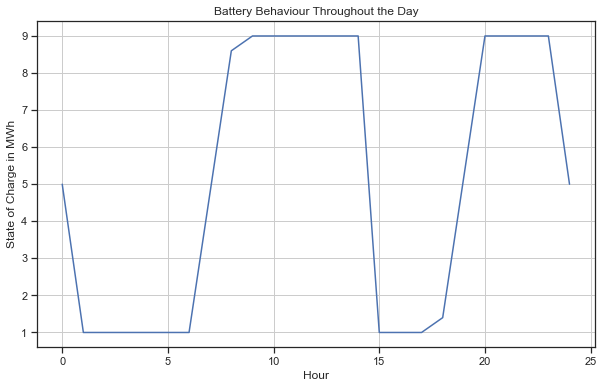

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of x-axis values for the time series data
x = list(range(len(batteryStateOfCharge)))

# create a line chart with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=batteryStateOfCharge)

# set the title and axis labels
plt.title('Battery Behaviour Throughout the Day')
plt.xlabel('Hour')
plt.ylabel('State of Charge in MWh')

# add gridlines to the chart
plt.grid()

# show the chart
plt.show()
